In [1]:
import os
import re
import argparse
import scipy
import numpy as np
import pandas as pd
from Bio import SeqIO
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt

# Import data

In [2]:
path = '/home/anais/Documents/Projet/G4Conservation/'
dfMonoGene = pd.DataFrame()
dfTriGene = pd.DataFrame()

spList = ['candidatus_korarchaeum_cryptofilum_opf8', 'halobacterium_salinarum_r1',
      'myxococcus_xanthus_dk_1622', 'thermus_thermophilus_hb8',
      'leishmania_major', 'pyrococcus_horikoshii_ot3', 'escherichia_coli_str_k_12_substr_mg1655',
      'mycobacterium_tuberculosis_h37rv', 'saccharomyces_cerevisiae', 'chlamydomonas_reinhardtii']

for sp in spList:
    dfTmp = pd.read_csv(path+'reviewShuffle/reviewShuffle/'+sp+'/pG4_Shuffle_Mono_Gene.csv', sep='\t')
    dfTmp['Sp'] = sp
    dfMonoGene = dfMonoGene.append(dfTmp)
    
    dfTmp = pd.read_csv(path+'reviewShuffle/reviewShuffle/'+sp+'/pG4_Shuffle_Tri_Tot_Gene.csv', sep='\t')
    dfTmp['Sp'] = sp
    dfTriGene = dfTriGene.append(dfTmp)
    
dfMonoGene = dfMonoGene[dfMonoGene.pG4Start != 'pG4Start']
dfTriGene = dfTriGene[dfTriGene.pG4Start != 'pG4Start']

/home/anais/software/projectsVp3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (1,2,3,4,5,6,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# check pG4 length

In [3]:
dfMonoGene.head()

,Gene,meancGcC,meanG4H,meanG4NN,pG4Start,pG4End,Chromosome,Strand,Sequence,Description,Repro,Sp
0,Kcr_R0001,14.075757575757578,1.4,0.7126250817085089,31,100,Chromosome,+,AGCAGCACGGAACGGGCGGGGGTAACTCACTACTCAGGGCGGTGGG...,Kcr_R0001:Chromosome:2012~2124:+,1,candidatus_korarchaeum_cryptofilum_opf8
1,Kcr_0006,7.727272727272727,0.9,0.5846454626740698,11,70,Chromosome,-,TGGCGTGGGCGCGGGGCTAGCAAGGGGGATGTTGTTCCAAGAGGTA...,Kcr_0006:Chromosome:3525~5477:-,1,candidatus_korarchaeum_cryptofilum_opf8
2,Kcr_0006,7.583333333333332,1.0833333333333333,0.7740664356036223,1141,1200,Chromosome,-,TTATGGGGTGGGAGGGAGTACACGACACAATTGTCTAGGACTAGGA...,Kcr_0006:Chromosome:3525~5477:-,1,candidatus_korarchaeum_cryptofilum_opf8
3,Kcr_0008,7.6,1.0,0.8794254558984221,891,950,Chromosome,+,GAGGGTGGACATAAATGCAGGTGAGTGTGAGTGAAGGGCGGGACTT...,Kcr_0008:Chromosome:6797~7813:+,1,candidatus_korarchaeum_cryptofilum_opf8
4,Kcr_0009,9.125,0.95,0.5920479414624158,121,180,Chromosome,+,TTAGACCGGGGTGGTGGAGCGGTGGCGGCTTTAGGAAATAGATTAG...,Kcr_0009:Chromosome:7813~9165:+,1,candidatus_korarchaeum_cryptofilum_opf8


In [4]:
dfMonoGene['LengthpG4'] = dfMonoGene['pG4End'].astype(int) - dfMonoGene['pG4Start'].astype(int) +1
dfTriGene['LengthpG4'] = dfTriGene['pG4End'].astype(int) - dfTriGene['pG4Start'].astype(int) +1

74.85679614796628
21.210850285897536


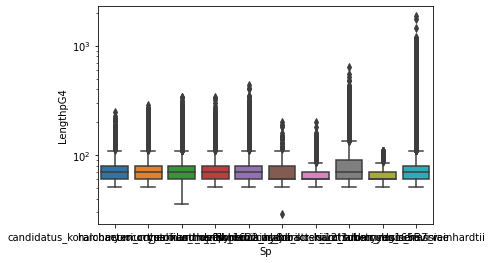

74.83159082865937
21.751823465242047


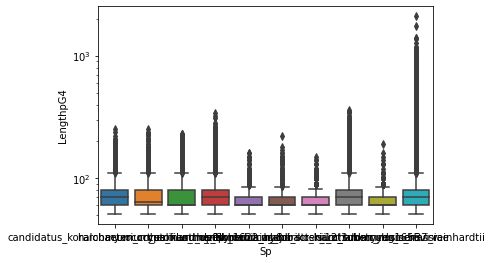

In [5]:
print(dfMonoGene[dfMonoGene.Sp == 'chlamydomonas_reinhardtii'].LengthpG4.mean())
print(dfMonoGene[dfMonoGene.Sp == 'chlamydomonas_reinhardtii'].LengthpG4.std())
sns.boxplot(x="Sp", y="LengthpG4", data=dfMonoGene)
plt.yscale('log')
plt.show()
print(dfTriGene[dfTriGene.Sp == 'chlamydomonas_reinhardtii'].LengthpG4.mean())
print(dfTriGene[dfTriGene.Sp == 'chlamydomonas_reinhardtii'].LengthpG4.std())
sns.boxplot(x="Sp", y="LengthpG4", data=dfTriGene)
plt.yscale('log')
plt.show()

   Chromosome               Gene  \
0           7  CHLRE_07g354600v5   
1           7  CHLRE_07g354600v5   
2           7  CHLRE_07g354600v5   
3           7  CHLRE_07g354600v5   
4           7  CHLRE_07g354600v5   

                                            Sequence Strand   locEnd  \
0  GGCAGACCGGCCCGACCGGTGAGGGAGGGAGAGGGAGAGGAAGCAG...      -  6001612   
1  CGGTGCAGGGACCGGCTGCTGGCTCGGCTGGTGCGGCTGCGGGAGG...      -  6001612   
2  AGCCCATACGGCAGCTGGAGCTGCAGGAGGAGGCGCAGGTGGGGGC...      -  6001612   
3  GCGGCGGTGCAGCTGCTACAGGTGCGGTTGGGGAAGGCGCGGGCTC...      -  6001612   
4  AGGCGGAGATGCCGCGGCGCTGGGAGGTGGTGGTGGCGGAGGCGCG...      -  6001612   

   locStart   meanG4H  meanG4NN   meancGcC   pG4End  pG4Start  
0   5983497  1.127778  0.584758   6.335137  5984456   5984357  
1   5983497  1.031481  0.687864   8.017576  5984676   5984507  
2   5983497  1.183333  0.846200  10.857602  5985376   5985257  
3   5983497  0.900000  0.711823   4.750000  5985736   5985677  
4   5983497  1.044444  0.72018

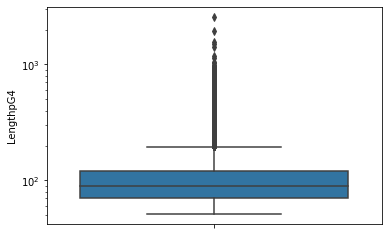

In [6]:
dfCrei = pd.read_csv(path+'data/'+sp+'/Gene_pG4WT.csv', sep='\t')
print(dfCrei.head())
dfCrei['LengthpG4'] = dfCrei['pG4End'].astype(int) - dfCrei['pG4Start'].astype(int) +1
print(dfCrei.LengthpG4.mean())
print(dfCrei.LengthpG4.std())
sns.boxplot(y="LengthpG4", data=dfCrei)
plt.yscale('log')
plt.show()

In [7]:
meanLength = []
groups = dfMonoGene.groupby('Sp')
for spName, spDf in groups:
    if spName == 'chlamydomonas_reinhardtii':
        groups2 = spDf.groupby('Repro')
        for repro, reproDf in groups2:
            meanLength.append(reproDf.LengthpG4.mean())
print(sum(meanLength)/float(len(meanLength)))

meanLength = []
groups = dfTriGene.groupby('Sp')
for spName, spDf in groups:
    if spName == 'chlamydomonas_reinhardtii':
        groups2 = spDf.groupby('Repro')
        for repro, reproDf in groups2:
            meanLength.append(reproDf.LengthpG4.mean())
print(sum(meanLength)/len(meanLength))    

74.84798634329236
74.8226318503486


# get gene length

In [8]:
dico = {}
for sp in spList:
    filename = path+'data/'+sp+'/Sequences_Gene_WT.fa'
    try:
        fastaOrigin = SeqIO.parse(open(filename),'fasta')
    except:
        pass
    else:
        for fasta in fastaOrigin:
            name, seq = fasta.id, str(fasta.seq)
            if sp not in dico:
                dico[sp] = 0
            dico[sp] += len(seq)
pprint(dico)

{'candidatus_korarchaeum_cryptofilum_opf8': 1450167,
 'chlamydomonas_reinhardtii': 93552813,
 'escherichia_coli_str_k_12_substr_mg1655': 4179326,
 'halobacterium_salinarum_r1': 2431921,
 'leishmania_major': 16195547,
 'mycobacterium_tuberculosis_h37rv': 4044657,
 'myxococcus_xanthus_dk_1622': 8412500,
 'pyrococcus_horikoshii_ot3': 1741027,
 'saccharomyces_cerevisiae': 9266162,
 'thermus_thermophilus_hb8': 2043895}


In [9]:
lenFasta = 0
G = 0
C = 0
filename = path+'data/chlamydomonas_reinhardtii/Sequences_Gene_WT.fa'
try:
    fastaOrigin = SeqIO.parse(open(filename),'fasta')
except:
    pass
else:
    for fasta in fastaOrigin:
        name, seq = fasta.id, str(fasta.seq)
        lenFasta += len(seq)
        G += seq.count('G')
        C += seq.count('C')
print(lenFasta)
print(G)
print(C)

lenFasta = 0
G = 0
C = 0
filename = path+'data/chlamydomonas_reinhardtii/Sequences_Shuffled_Tri_Gene.fa'
try:
    fastaOrigin = SeqIO.parse(open(filename),'fasta')
except:
    pass
else:
    for fasta in fastaOrigin:
        name, seq = fasta.id, str(fasta.seq)
        lenFasta += len(seq)
        G += seq.count('G')
        C += seq.count('C')
print(lenFasta)
print(G)
print(C)

93552813
31676021
28192024
0
0
0


# Gene

In [10]:
dfDensMono = pd.DataFrame()
groups = dfMonoGene.groupby('Sp')
for spName, spDf in groups:
    groups2 = spDf.groupby('Repro')
    for reproName, reproDf in groups2:
        row = {'Sp': [spName], 'Dens': [len(reproDf) / float(dico[spName]) *1000]}
        dfDensMono = dfDensMono.append(pd.DataFrame(data=row))

dfDensTri = pd.DataFrame()
groups = dfTriGene.groupby('Sp')
for spName, spDf in groups:
    groups2 = spDf.groupby('Repro')
    for reproName, reproDf in groups2:
        row = {'Sp': [spName], 'Dens': [len(reproDf) / float(dico[spName]) *1000]}
        dfDensTri = dfDensTri.append(pd.DataFrame(data=row))

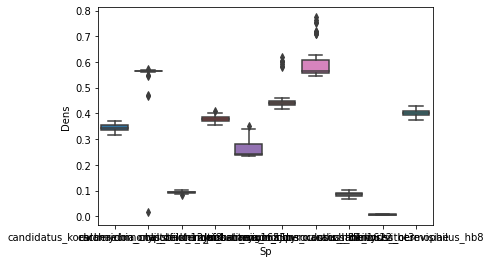

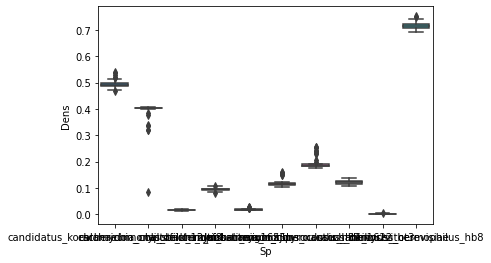

In [11]:
sns.boxplot(x="Sp", y="Dens", data=dfDensMono)
plt.show()
sns.boxplot(x="Sp", y="Dens", data=dfDensTri)
plt.show()

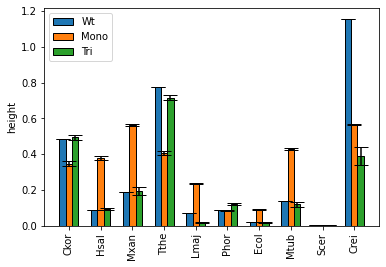

In [12]:
dicoTp = {'Sp': ['candidatus_korarchaeum_cryptofilum_opf8', 'halobacterium_salinarum_r1',
                 'myxococcus_xanthus_dk_1622', 'thermus_thermophilus_hb8', 'leishmania_major',
                 'pyrococcus_horikoshii_ot3', 'escherichia_coli_str_k_12_substr_mg1655',
                 'mycobacterium_tuberculosis_h37rv', 'saccharomyces_cerevisiae', 'chlamydomonas_reinhardtii',
                 'candidatus_korarchaeum_cryptofilum_opf8', 'halobacterium_salinarum_r1',
                 'myxococcus_xanthus_dk_1622', 'thermus_thermophilus_hb8', 'leishmania_major',
                 'pyrococcus_horikoshii_ot3', 'escherichia_coli_str_k_12_substr_mg1655',
                 'mycobacterium_tuberculosis_h37rv', 'saccharomyces_cerevisiae', 'chlamydomonas_reinhardtii'],
         'Mean': [0.484652, 0.086868, 0.190722, 0.774935, 0.074079, 0.0903, 0.018923, 0.140327, 0.0027, 1.15765,
                  0.347403, 0.378966, 0.561457, 0.40569, 0.238899, 0.083801, 0.091237, 0.430635, 0.005757, 0.565293],
         'Std': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                 0.013227, 0.008951, 0.005637, 0.011889, 0.003053, 0.002101, 0.004177, 0.006999, 0.000777, 0.001861],
         'Type': ['Wt','Wt','Wt','Wt','Wt','Wt','Wt','Wt','Wt', 'Wt',
                  'Mono','Mono','Mono','Mono','Mono','Mono','Mono','Mono','Mono', 'Mono']}  

dfHisto = pd.DataFrame(data=dicoTp)
for sp in spList:
    row = {'Sp': [sp], 'Mean': [dfDensTri[dfDensTri.Sp == sp].Dens.mean()], 'Std': [dfDensTri[dfDensTri.Sp == sp].Dens.std()], 'Type': ['Tri']}
    dfHisto = dfHisto.append(pd.DataFrame(data=row))

# width of the bars
barWidth = 0.2

# Choose the height of the blue bars
bars00 = dfHisto[dfHisto.Type == 'Wt']['Mean']

# Choose the height of the blue bars
bars0 = dfHisto[dfHisto.Type == 'Mono']['Mean']
 
# Choose the height of the cyan bars
bars2 = dfHisto[dfHisto.Type == 'Tri']['Mean']

# Choose the height of the error bars (bars1)
yer00 = dfHisto[dfHisto.Type == 'Wt']['Std']

# Choose the height of the error bars (bars1)
yer0 = dfHisto[dfHisto.Type == 'Mono']['Std']
 
# Choose the height of the error bars (bars2)
yer2 = dfHisto[dfHisto.Type == 'Tri']['Std']
 
# The x position of bars
r00 = np.arange(len(bars00))
r0 = [x + barWidth for x in r00]
r2 = [x + barWidth for x in r0]

# Create blue bars
plt.bar(r00, bars00, width = barWidth, edgecolor = 'black', yerr=yer00, capsize=7, label='Wt')

# Create blue bars
plt.bar(r0, bars0, width = barWidth, edgecolor = 'black', yerr=yer0, capsize=7, label='Mono')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, edgecolor = 'black', yerr=yer2, capsize=7, label='Tri')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars2))], ['Ckor', 'Hsal', 'Mxan', 'Tthe',
                                                        'Lmaj', 'Phor', 'Ecol', 'Mtub', 'Scer', 'Crei'])
plt.ylabel('height')
plt.xticks(rotation=90)
plt.legend()
 
# Show graphic
plt.savefig('/home/anais/Pictures/Article2/review/HistogramShuffleMonoTri.svg')
plt.rcParams['figure.figsize'] = [15, 5]
plt.show()